In [1]:
from __future__ import print_function

In [2]:
__author__ = 'fbb'

In [3]:
import pylab as pl
import numpy as np
import pandas as pd

import statsmodels as sm
import os
import json
s = json.load(open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json'));
pl.rcParams.update(s)


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# A better package to plot scatter matrices 
#corner https://github.com/dfm/corner.py

making some synthetic data by concatenating 5 sets of 2 gaussian distributions with different mean and stdev 

In [7]:
ndim, nsamples = 5, 10000
samples = np.zeros([ndim, nsamples])
for i in range(ndim):
    samples[i] = np.concatenate(
        [np.random.randn(nsamples/2),(np.random.randn(nsamples/2)+(i+1))/(5-i)])
data = pd.DataFrame(samples.T)
data.head()

,0,1,2,3,4
0,1.247814,0.592263,-0.755376,-0.403232,1.246652
1,1.453479,1.568520,-0.658367,0.561720,-1.541272
2,0.267980,0.130506,2.805515,2.377901,0.158670
3,1.353876,-0.842823,-1.263274,1.030076,-0.183633
4,-1.035042,1.139182,-1.871309,-0.564035,-1.152736


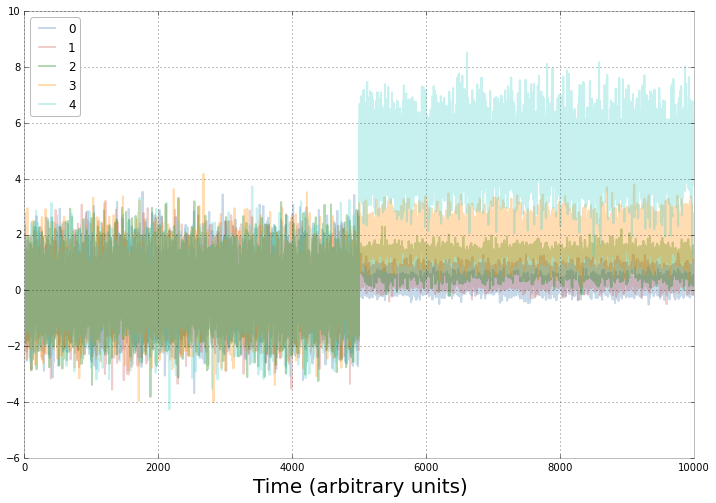

In [8]:
data.plot(figsize=(12,8), alpha=0.3);
pl.xlabel("Time (arbitrary units)", fontsize=20)
pl.show()

#the pandas scatter matrix

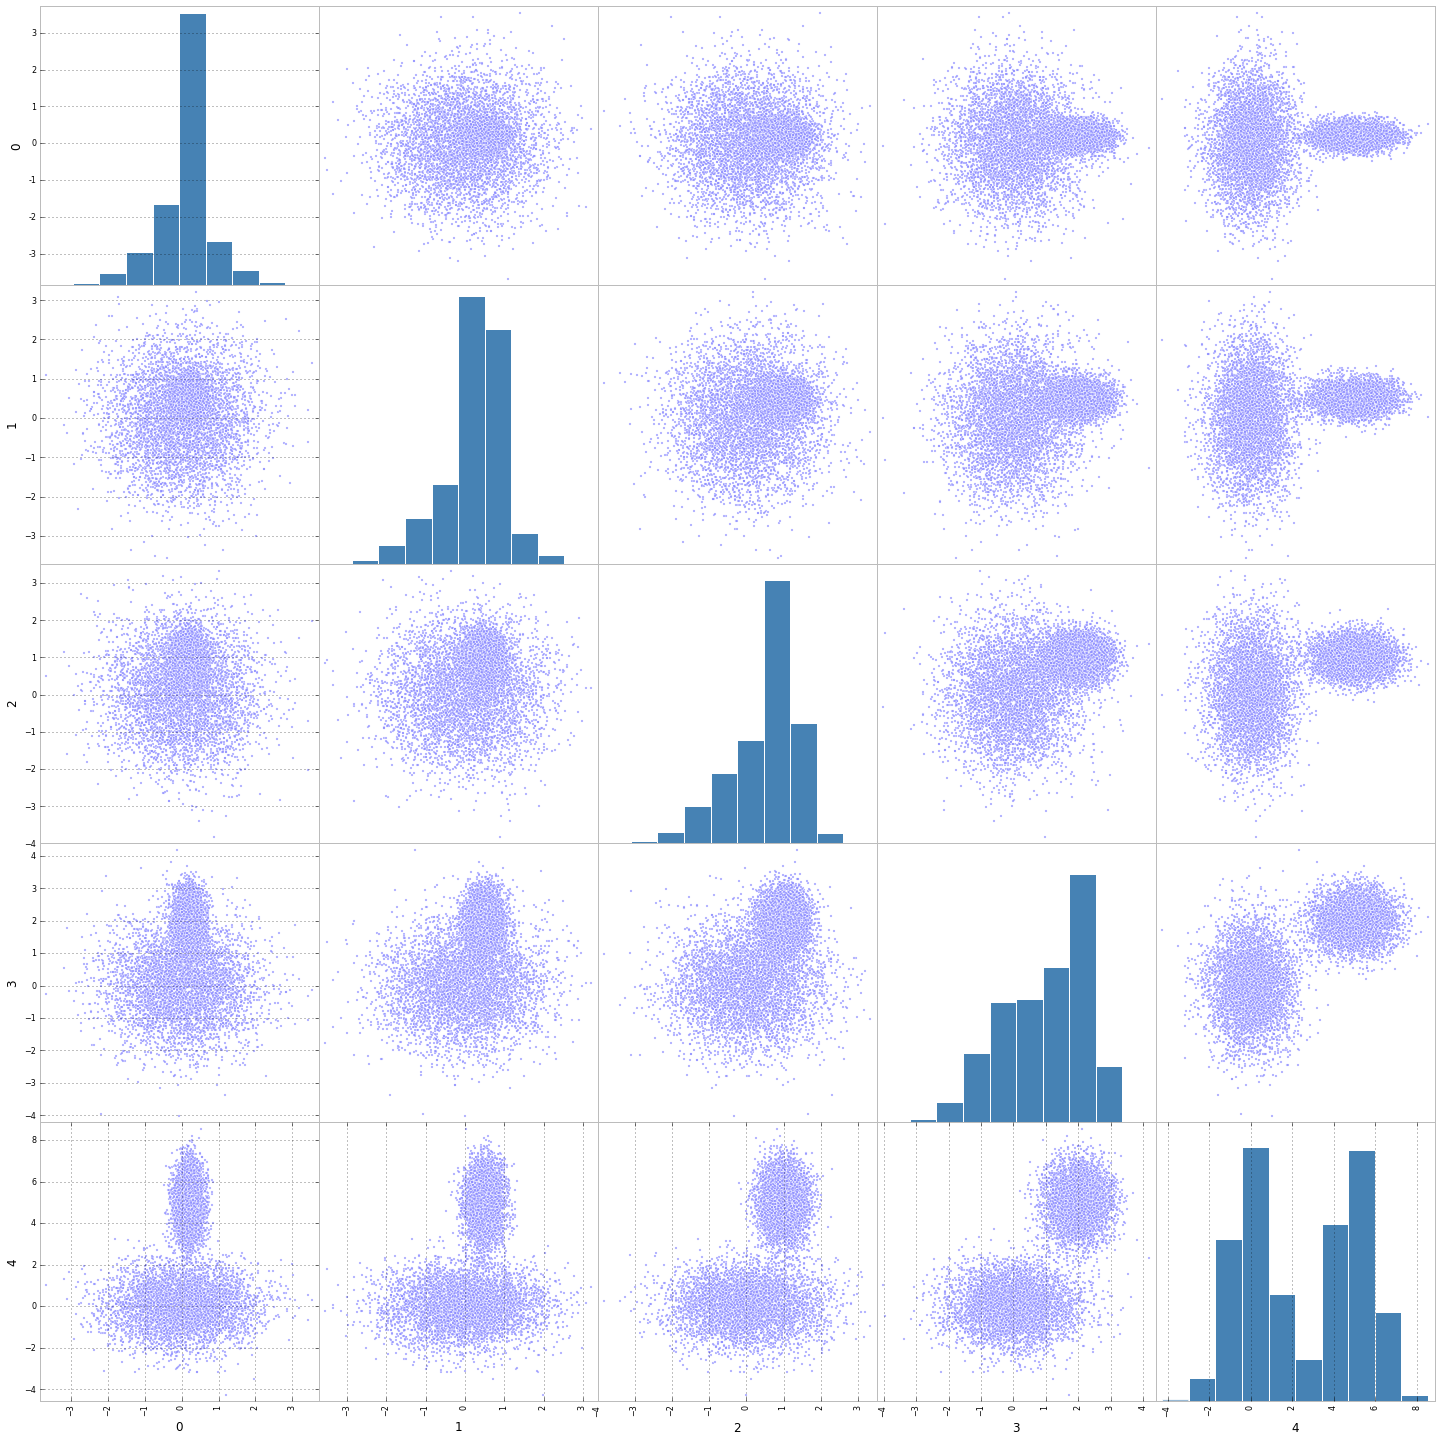

In [12]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, figsize=(25,25));
pl.show()

#the corner.py scatter matrix

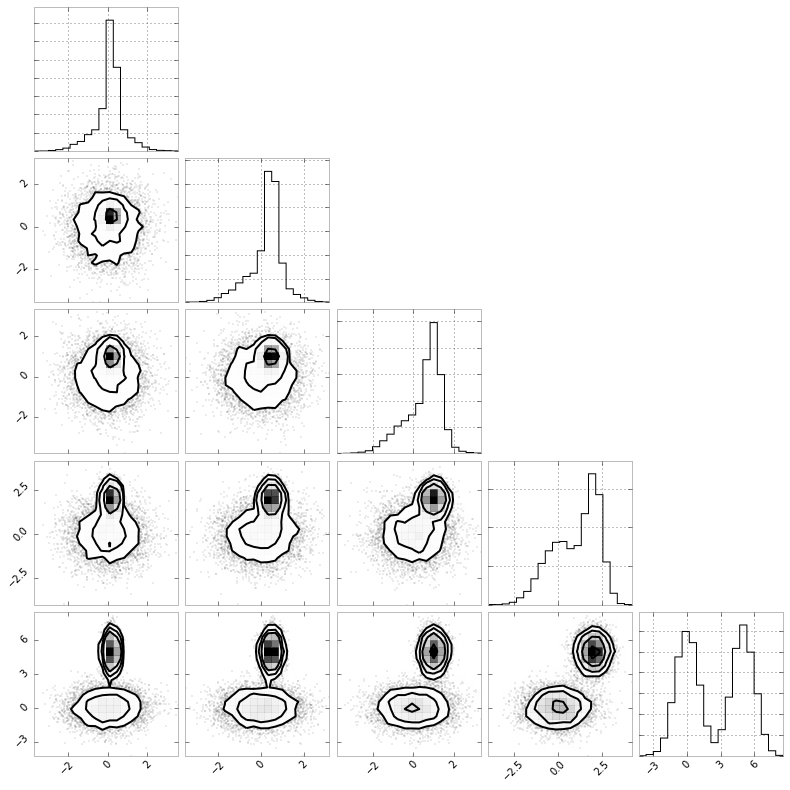

In [10]:
import corner

figure = corner.corner(samples.T)
figure.savefig("corner.png")
pl.show()

* remove redundancy: the matrix is symmetric fo the triangle above the diagonal is redundant with the triangle below)
* remove clutter by data reduction: where the points are so dense that the distribution cannot be appreciated substitute the points with contour lines that show the distribution
* remove unnecessary color: at this stage the color is not conveying any information. by removing color here we can use it to communicate non redundant information (as below)

#corner plot with median value markes (in color), confidence intervals, variable median and 1std values markes, and axes labels

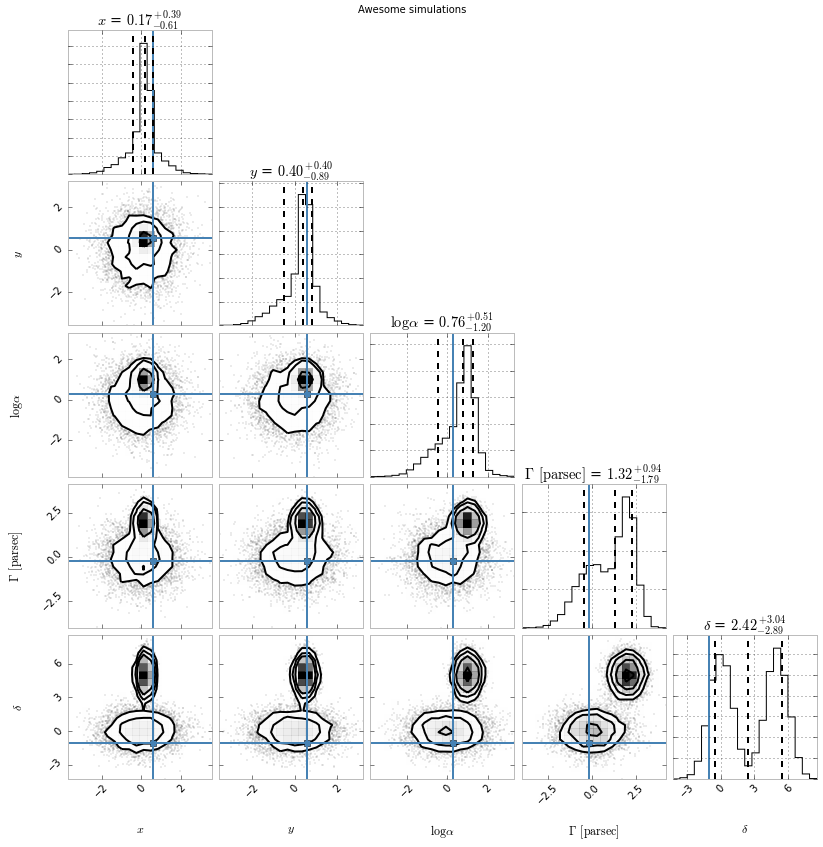

In [16]:
figure = corner.corner(samples.T, labels=[r"$x$", r"$y$", r"$\log \alpha$",
                                     r"$\Gamma \, [\mathrm{parsec}]$", r"$\delta$"],
                         truths=[np.median(s) for s in samples.T],
                         quantiles=[0.16, 0.5, 0.84],
                         show_titles=True, title_args={"fontsize": 20}, figsize=(20,20))
figure.gca().annotate("Awesome simulations", xy=(0.5, 1.0), xycoords="figure fraction",
                      xytext=(0, -5), textcoords="offset points",
                      ha="center", va="top")
pl.show()